# Introduction to time offsets in `gwrefpy`

This notebook introduces the concept of _time offsets_ and how they are used in `gwrefpy`.

Time offsets are a concept to handle time series with different timestamps. If two time series share the same timestamps, they can be compared directly. If not, we need to introduce a time offset to align them. The offset represents an interval for which all data points will be considered as having the same timestamp.

In the following notebook, we will illustrate this concept with a simple example. The example is provided by section _xx_ in [Strandanger (2024)]().

In [11]:
import gwrefpy as gr
import pandas as pd
import matplotlib.pyplot as plt

# Data

Let's start by declaring the data we will explore as an example. We create `Well` objects and add to a `Model` object. Finally, we plot the data.

In [12]:
obs_ts = pd.Series(
    index=[
        pd.Timestamp("2023-01-07"),
        pd.Timestamp("2023-02-01"),
        pd.Timestamp("2023-02-25"),
    ],
    data=[11.4, 11.7, 11.8],
    name="obs",
)
ref_ts = pd.Series(
    index=[
        pd.Timestamp("2023-01-08"),
        pd.Timestamp("2023-02-03"),
        pd.Timestamp("2023-02-08"),
        pd.Timestamp("2023-02-25"),
        pd.Timestamp("2023-02-28"),
    ],
    data=[8.9, 9.2, 9.3, 9.3, 9.5],
    name="ref",
)
obs = gr.Well("obs", False, obs_ts)
ref = gr.Well("ref", True, ref_ts)

model = gr.Model("offset test")
model.add_well([obs, ref])

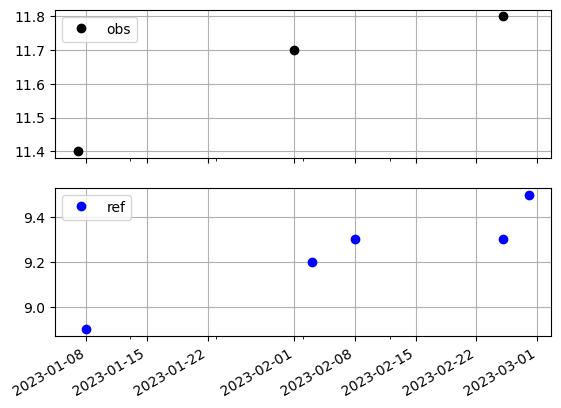

In [13]:
fig, (up, down) = plt.subplots(nrows=2, sharex=True)

obs_ts.plot(ax=up, marker="o", linestyle="", label="obs", color="black")
ref_ts.plot(ax=down, marker="o", linestyle="", label="ref", color="blue")
_ = [ax.legend() for ax in (up, down)]
_ = [ax.grid() for ax in (up, down)]

As we can see, the wells share some timestamps, but not all.

# Time offsets

Let's start by doing a regression between the two wells without any time offset. Technically, this means using `0` as the time offset.

The offset argument can be given as a string or a `pandas.Timedelta` object. Here you can find the [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html) for more information about the accepted formats.

In [14]:
model.fit(
    obs, ref, offset="0D"
)

Fitting model 'offset test' using reference well 'ref' and observation well 'obs'.


/home/ankan/python/gwrefpy/src/gwrefpy/methods/linregressfit.py:79: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  res = sp.stats.linregress(ref_timeseries, obs_timeseries)
/home/ankan/python/gwrefpy/src/gwrefpy/methods/linregressfit.py:62: RuntimeWarning: invalid value encountered in scalar divide
  stderr = np.sum(residuals**2) - np.sum(


Statistic,Value,Description
RMSE,nan,Root Mean Square Error
R²,nan,Coefficient of Determination
R-value,nan,Correlation Coefficient
Slope,nan,Linear Regression Slope
Intercept,nan,Linear Regression Intercept
P-value,nan,Statistical Significance
N,1,Number of Data Points
Std Error,nan,Standard Error
Confidence,95.0%,Confidence Level


Yikes! Seems like we can't obtain a fit because the wells only share one common timestamp. Let's try again, but this time we will introduce a time offset of 1 week. This means an offset of `3.5D` in both directions. An offset of `3.5D` means that all data points within 3.5 days before and after a timestamp will be considered as having the same timestamp.

In [15]:
model.fit(
    obs, ref, offset="3.5D"
)

Fitting model 'offset test' using reference well 'ref' and observation well 'obs'.


Statistic,Value,Description
RMSE,0.9862,Root Mean Square Error
R²,0.9727,Coefficient of Determination
R-value,0.9862,Correlation Coefficient
Slope,0.8158,Linear Regression Slope
Intercept,4.1553,Linear Regression Intercept
P-value,0.1057,Statistical Significance
N,3,Number of Data Points
Std Error,0.0487,Standard Error
Confidence,95.0%,Confidence Level


Much better! The fit report indicates that 3 data points were used to obtain the results. Let's look at how `gwrefpy` determined which data points to use.